In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
import os
import sys
import csv
scripts_path = os.path.abspath(os.path.join('../scripts/'))
data_path = os.path.abspath(os.path.join('../data/'))
sys.path.append(scripts_path)
sys.path.append(data_path)
    

In [3]:
scripts_path

'/home/treharne/Documents/projects/SAZO/scripts'

In [40]:
path = data_path + '/T/160601_A_extract_d.txt'

In [41]:
path

'/home/treharne/Documents/projects/SAZO/data/T/160601_A_extract_d.txt'

In [179]:
f = open(path, 'rb')
reader = csv.reader(f)
data = []
for line in reader:
    #nice and pythonic here
    data.append([float(x) for x in line[0].split(' ')])

In [94]:
len(data)

100

In [73]:
trans_data = np.transpose(data)

In [335]:
x = []
y = []
for i in range(0, 10):
    if i % 2 == 0:
        for j in range(0, 10):
            x.append((j-4.5)*10)
            y.append((4.5-i)*10)
    else:
        for j in range(0, 10):
            x.append((4.5 - j)*10)
            y.append((4.5-i)*10)
            
z = trans_data[2]

In [336]:
newarray = x,y,z

In [337]:
tnewarray=np.transpose(np.array(newarray))
len(tnewarray)


count = 0
array1 = []
array2 = []
for line in tnewarray:
    
    if 45.0 in line:
        
        count += 1
        print count, line
    else:
        array1.append(line)

for line in array1:
    if -45 not in line:
        array2.append(line)
        
        


1 [ -45.   45.  146.]
2 [ -35.   45.  167.]
3 [ -25.   45.  199.]
4 [ -15.   45.  238.]
5 [  -5.   45.  274.]
6 [   5.   45.  302.]
7 [  15.   45.  332.]
8 [  25.   45.  345.]
9 [  35.   45.  333.]
10 [  45.   45.  349.]
11 [  45.   35.  363.]
12 [  45.   25.  409.]
13 [  45.   15.  407.]
14 [  45.    5.  382.]
15 [  45.   -5.  343.]
16 [  45.  -15.  311.]
17 [  45.  -25.  262.]
18 [  45.  -35.  221.]
19 [  45.  -45.  309.]


In [338]:
a2t = np.transpose(array2)

In [339]:
xi = np.linspace(min(a2t[0]), max(a2t[0]), 100)
yi = np.linspace(min(a2t[1]), max(a2t[1]), 100)

In [340]:
zi = griddata(a2t[0], a2t[1], a2t[2], xi, yi)

<a list of 10 text.Text objects>

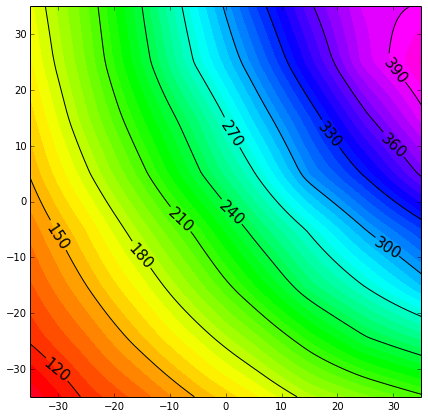

In [345]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

S = ax.contour(xi, yi, zi, 10, colors='k')
CF = ax.contourf(xi, yi, zi, 50, cmap='gist_rainbow')
ax.clabel(S, fontsize=15, fmt='%1.0f')

In [346]:
rs_path = data_path + '/4PP/160602_A.dat'

In [168]:
rs_path

'/home/treharne/Documents/projects/SAZO/data/4PP/160602_A.dat'

In [151]:
import rs_contour as cont

In [152]:
rs = cont.get_data(rs_path)

In [233]:
rstrans = np.transpose(rs)
array1 = []
array2b = []
for line in rstrans:
    
    if 45.0 in line:
        
        count += 1
        print count, line
    else:
        array1.append(line)

for line in array1:
    if -45.0 not in line:
        array2b.append(line)

20 [  -45.         45.       2282.67387     0.     ]
21 [ -35.         45.        532.832166    0.      ]
22 [ -25.        45.       128.52393    0.     ]
23 [-15.        45.        51.375918   0.      ]
24 [ -5.        45.        41.496876   0.      ]
25 [  5.        45.        52.568824   0.      ]
26 [  15.         45.        114.342428    0.      ]
27 [  25.         45.        559.147853    0.      ]
28 [   35.          45.        4892.830599     0.      ]
29 [  4.50000000e+01   4.50000000e+01   7.62301884e+04   0.00000000e+00]
30 [   45.        35.      4180.5735     0.    ]
31 [  45.         25.        482.957448    0.      ]
32 [  45.         15.        109.936463    0.      ]
33 [ 45.         5.        49.870833   0.      ]
34 [ 45.        -5.        34.520969   0.      ]
35 [ 45.       -15.        29.198965   0.      ]
36 [ 45.       -25.        27.826087   0.      ]
37 [ 45.       -35.        30.588411   0.      ]
38 [ 45.       -45.        37.796882   0.      ]


In [230]:
rsagain = np.transpose(array2)
xr, yr, zr = cont.format_data(rsagain)

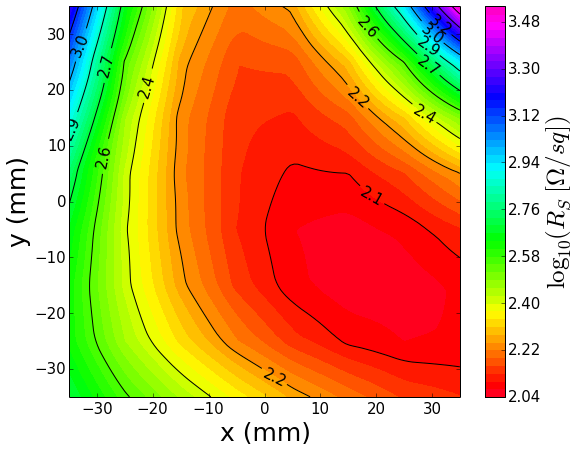

In [231]:
plot = cont.plot_contour(xr, yr, zr)

In [282]:
A = sortthis(array2)
B = sortthis(array2b)


In [283]:
def formatthis(array):
    x = array[0]
    y = array[1]
    z = array[2]
    
    xi = np.linspace(min(x), max(x), 100)
    yi = np.linspace(min(y), max(y), 100)
    zi = griddata(x, y, z, xi, yi)
    
    return xi, yi, zi

In [305]:
Ai = formatthis(np.transpose(A))
Bi = formatthis(np.transpose(B))
Ci = np.log10((Ai[2]*Bi[2]*4.532*1e-7))

In [306]:
Ci

array([[-2.28923148, -2.29212156, -2.29525406, ..., -2.55113576,
        -2.55096368, -2.55080488],
       [-2.28850246, -2.29163665, -2.29501329, ..., -2.54891458,
        -2.54862855, -2.54835491],
       [-2.28788749, -2.29126425, -2.2948838 , ..., -2.54682274,
        -2.54642037, -2.54602955],
       ..., 
       [-1.54086513, -1.55879046, -1.57810213, ..., -0.96794808,
        -0.94248459, -0.91837067],
       [-1.52855108, -1.54657727, -1.56599826, ..., -0.94360079,
        -0.91809853, -0.89395957],
       [-1.51653142, -1.53465447, -1.55418037, ..., -0.92062659,
        -0.89509997, -0.87094899]])

<a list of 10 text.Text objects>

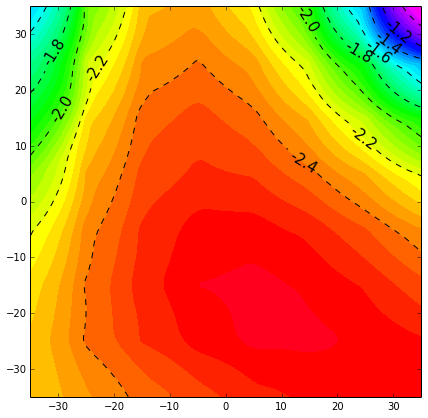

In [309]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

S = ax.contour(Ai[0], Ai[1], Ci, 10, colors='k')
CF = ax.contourf(Ai[0], Ai[1], Ci, 50, cmap='gist_rainbow')
ax.clabel(S, fontsize=15, fmt='%1.1f')

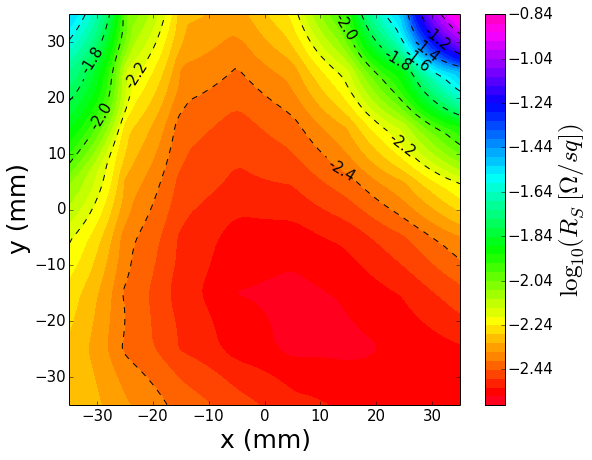

In [310]:
plot = cont.plot_contour(Ai[0], Ai[1], Ci)